## 1.1 Importing Libraries for Data Structures and Visualization

In [1]:
import pandas as pd        #for dataframe data structure
import numpy as np         # for numpy arrays and scientific computations
import matplotlib.pyplot as plt      #for data visualization
import seaborn as sns                #for visualization
import sys

%matplotlib inline

## 1.2 Importing Libraries for Data Preprocessing

In [2]:
#for Data Preprocessing
from sklearn.preprocessing import StandardScaler       
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

## 1.3 Importing Libraries for Classifiers

In [3]:
#for Classifiers
from sklearn.linear_model import LogisticRegression    #for LogisticRegression Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier       #for Random Forest Model
from sklearn.naive_bayes import BernoulliNB 


## 1.4 Importing Dataset

In [4]:
card_df = pd.read_excel('default of credit card clients.xls',skiprows=[0],index_col="ID")

In [5]:
card_df.head(10).transpose()

ID,1,2,3,4,5,6,7,8,9,10
LIMIT_BAL,20000,120000,90000,50000,50000,50000,500000,100000,140000,20000
SEX,2,2,2,2,1,1,1,2,2,1
EDUCATION,2,2,2,2,2,1,1,2,3,3
MARRIAGE,1,2,2,1,1,2,2,2,1,2
AGE,24,26,34,37,57,37,29,23,28,35
PAY_0,2,-1,0,0,-1,0,0,0,0,-2
PAY_2,2,2,0,0,0,0,0,-1,0,-2
PAY_3,-1,0,0,0,-1,0,0,-1,2,-2
PAY_4,-1,0,0,0,0,0,0,0,0,-2
PAY_5,-2,0,0,0,0,0,0,0,0,-1


## 2.1 Data Inferences

In [6]:
card_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

## 2.2 Check for Missing Values

In [7]:
card_df.isnull().sum()                 # no NA values present in the dataset

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## 2.3 Descriptive Analysis

No missing data, but a few anomalous things:

EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
MARRIAGE has a label 0 that is undocumented

In [8]:
# Categorical variables description
card_df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [9]:
# Payment delay description
card_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [10]:
# Bill Statement description
card_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [11]:
#Previous Payment Description
card_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [12]:
card_df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

## 2.4 Check Data Unbalancing

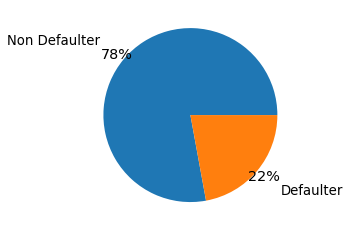

In [119]:
def_type = card_df['default payment next month'].value_counts()
def_label =['Non Defaulter','Defaulter']
plt.pie(def_type,labels=def_label,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.35)
plt.show()

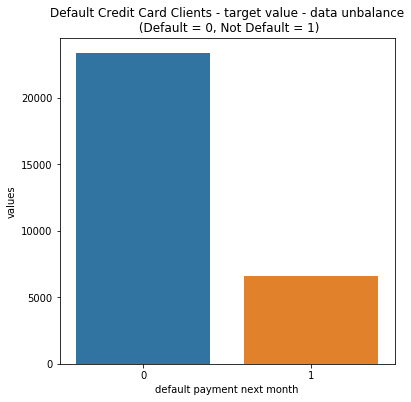

In [5]:
temp = card_df['default payment next month'].value_counts()
df = pd.DataFrame({'default payment next month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default payment next month', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

A number of 6,636 out of 30,000 (or 22%) of clients will default next month. The data has not a large unbalance with respect of the target value (default.payment.next.month).

## 2.5 Renaming Coumns : Output Column - Default

In [6]:
card_df = card_df.rename(columns={'default payment next month': 'default'})

In [7]:
# Separating features and target
y = card_df.default     # target default=1 or non-default=0
features = card_df.drop('default', axis = 1, inplace = False)

## 3. Feature Engineering

## 3.1 SEX Column

In [17]:
features['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

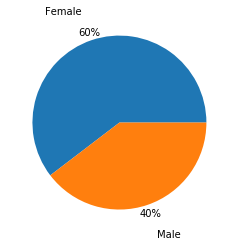

In [8]:
sex_type = card_df['SEX'].value_counts()
sex_label =['Female','Male']
plt.pie(sex_type,labels=sex_label,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.35)
plt.show()


## 3.2 EDUCATION Column

In [18]:
features['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [19]:
features['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

The categories 4:others, 5:unknown, and 6:unknown can be grouped into a single class '4'.

In [9]:
features['EDUCATION'] = features['EDUCATION'].replace([0,5,6],4)

In [21]:
features['EDUCATION'].value_counts()
#(card_df['EDUCATION']==0 ).sum()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

## 3.3 MARRIAGE Column

In [22]:
features["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Similarly, the column 'marriage' should have three categories: 1 = married, 2 = single, 3 = others but it contains a category '0' which will be joined to the category '3'.

One might wonder what these labels might mean.

"Other" in education can be an education lower than the high school level.
"Other" in marriage could be, for example, "divorced".

In [10]:
features['MARRIAGE'] = features['MARRIAGE'].replace(0,3)

In [24]:
features["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

## 3.4 PAY_n Columns

In [11]:
features = features.rename(columns={'PAY_0': 'PAY_1'})

In [26]:
features['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. Then what is -2? And what is 0? It seems to me the label has to be adjusted to 0 for pay duly.

In [12]:
features['PAY_1'] = features['PAY_1'].replace([-1,-2],0)
features['PAY_2'] = features['PAY_2'].replace([-1,-2],0)
features['PAY_3'] = features['PAY_3'].replace([-1,-2],0)
features['PAY_4'] = features['PAY_4'].replace([-1,-2],0)
features['PAY_5'] = features['PAY_5'].replace([-1,-2],0)
features['PAY_6'] = features['PAY_6'].replace([-1,-2],0)

In [28]:
features['PAY_1'].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

## 4 . Data Visualization

In [29]:
card_df = pd.concat([features,y],axis=1)

In [30]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [31]:
# Bar Chart Visualization Function
def single_bar_chart(feature):
    default_1 = card_df[card_df['default']==1][feature].value_counts()
    default_0 = card_df[card_df['default']==0][feature].value_counts()
    df = pd.DataFrame([default_0,default_1])
    df.index = ['default=0','default=1']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [32]:
# Bar Chart Visualization Function
def draw_barcharts(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, feature in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        
        default_1 = df[card_df['default']==1][feature].value_counts()
        default_0 = df[card_df['default']==0][feature].value_counts()
        df_temp = pd.DataFrame([default_0,default_1])
        df_temp.index = ['default=0','default=1']
        df_temp.plot(kind='bar',stacked=True, figsize=(10,5),ax=ax)
        ax.set_title(feature)
    plt.show()

## 4.1 Categorical

## 4.1.1 SEX 

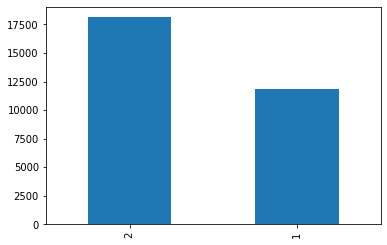

In [33]:
card_df.SEX.value_counts().plot(kind = 'bar')

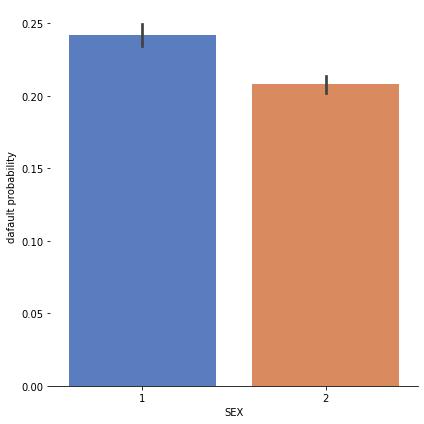

In [34]:
# Explore SEX feature vs default
g = sns.catplot(x="SEX",y="default",data=card_df, kind="bar" , height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("dafault probability")

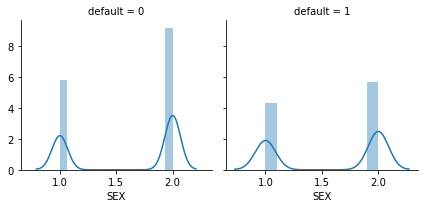

In [35]:
g = sns.FacetGrid(card_df, col='default')
g = g.map(sns.distplot, "SEX")

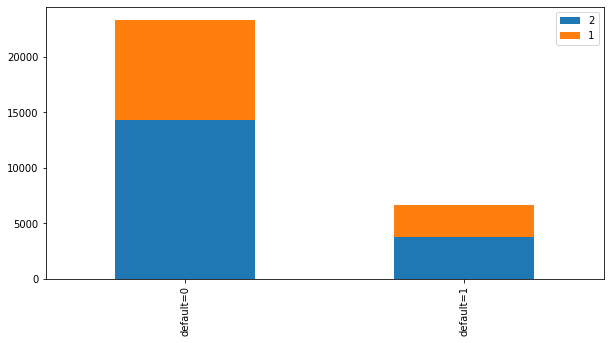

In [36]:
single_bar_chart('SEX')

## 4.1.2 MARRIAGE

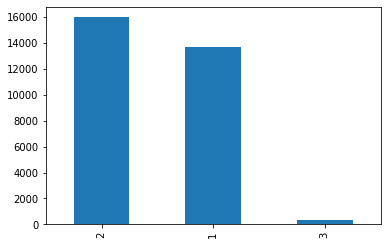

In [37]:
card_df.MARRIAGE.value_counts().plot(kind = 'bar')

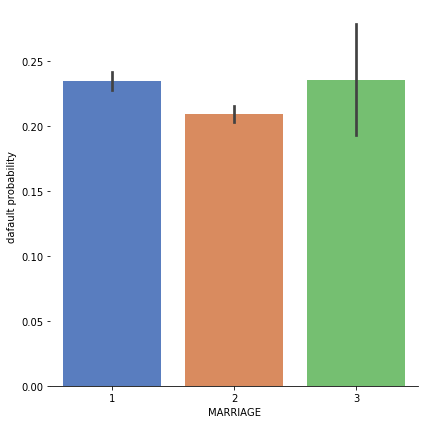

In [38]:
# Explore MARRIAGE feature vs default
g = sns.catplot(x="MARRIAGE",y="default",data=card_df, kind="bar" , height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("dafault probability")

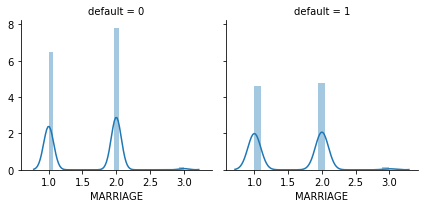

In [39]:
g = sns.FacetGrid(card_df, col='default')
g = g.map(sns.distplot, "MARRIAGE")

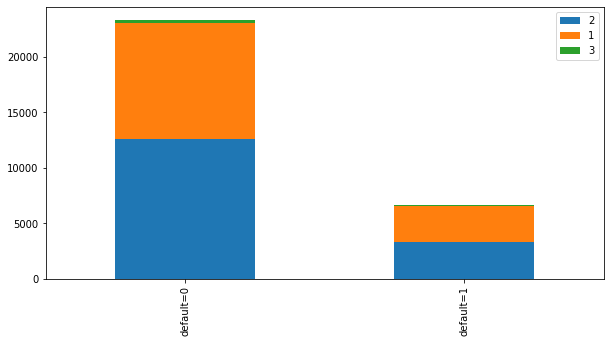

In [40]:
single_bar_chart("MARRIAGE")

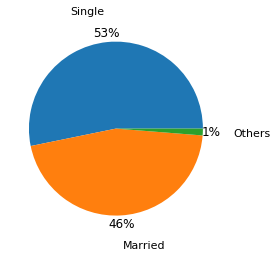

In [93]:
mari_type = card_df['MARRIAGE'].value_counts()
mari_label =['Single','Married','Others']
plt.pie(mari_type,labels=mari_label,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.35)
plt.show()

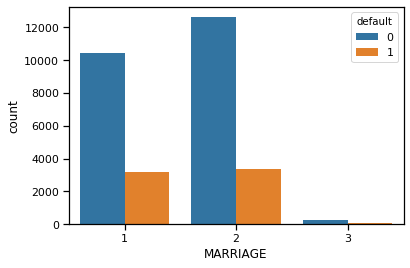

In [96]:
sns.countplot(x='MARRIAGE', data=card_df,hue="default")
plt.show()

## 4.1.3 EDUCATION

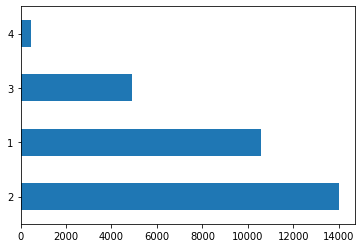

In [41]:
card_df.EDUCATION.value_counts().plot(kind = "barh")

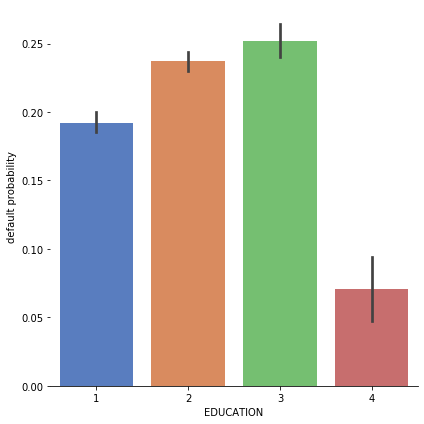

In [42]:
# Explore EDUCATION feature vs default
g = sns.catplot(x="EDUCATION",y="default",data=card_df,kind="bar" , height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("default probability")

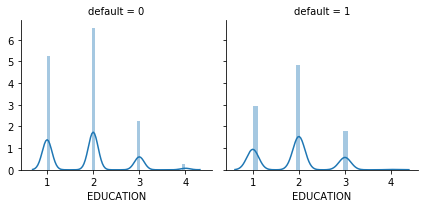

In [43]:
g = sns.FacetGrid(card_df, col='default')
g = g.map(sns.distplot, "EDUCATION")

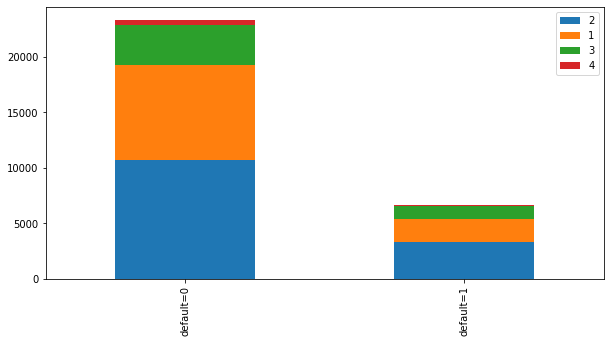

In [44]:
single_bar_chart("EDUCATION")

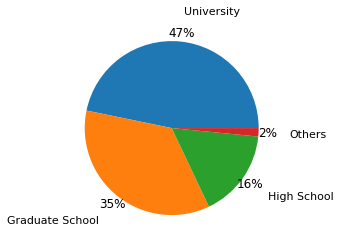

In [91]:
edu_type = card_df['EDUCATION'].value_counts()
edu_label =['University','Graduate School','High School','Others']
plt.pie(edu_type,labels=edu_label,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.35)
plt.show()

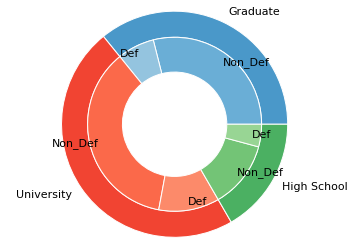

In [105]:
graduate_count= (card_df['EDUCATION']==1).sum()
graduate_df = card_df[card_df['EDUCATION']==1]
graduate_non_defauter = (graduate_df['default']==0).sum()

univerity_count= (card_df['EDUCATION']==2).sum()
uni_df = card_df[card_df['EDUCATION']==2]
university_non_defauter = (uni_df['default']==0).sum()

high_school_count= (card_df['EDUCATION']==3).sum()
high_df = card_df[card_df['EDUCATION']==3]
high_school_non_defauter = (high_df['default']==0).sum()

#1=graduate school, 2=university, 3=high school, 4=others
group_names=['Graduate', 'University', 'High School']
group_size=[graduate_count,univerity_count,high_school_count]
subgroup_names=['Non_Def', 'Def', 'Non_Def', 'Def', 'Non_Def', 'Def']
subgroup_size=[graduate_non_defauter,graduate_count-graduate_non_defauter,university_non_defauter,univerity_count-university_non_defauter,high_school_non_defauter,high_school_count-high_school_non_defauter]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.9, colors=[a(0.5),a(0.4),b(0.5),b(0.4),c(0.5),c(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


## 4.1.4 PAY_n

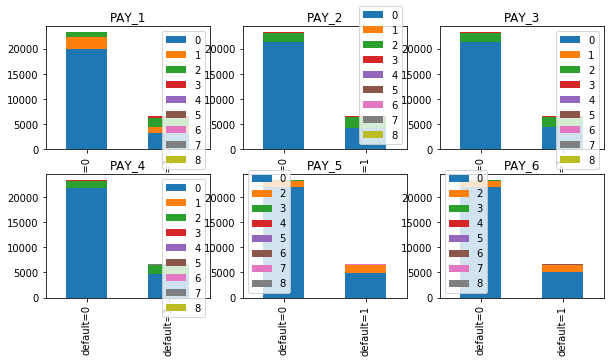

In [45]:
late = card_df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_barcharts(late, late.columns, 2, 3)

## PAY_1

In [46]:
#bar_chart('PAY_1')

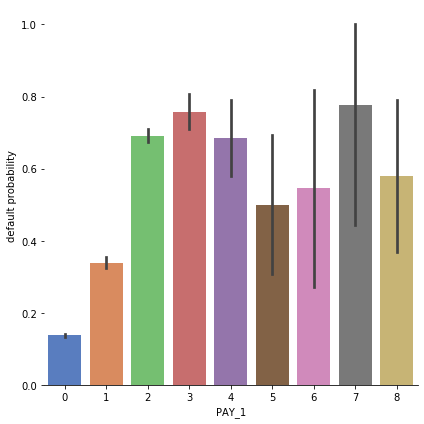

In [47]:
# Explore PAY_1 feature vs default
g = sns.catplot(x="PAY_1",y="default",data=card_df,kind="bar" , height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("default probability")

## PAY_2

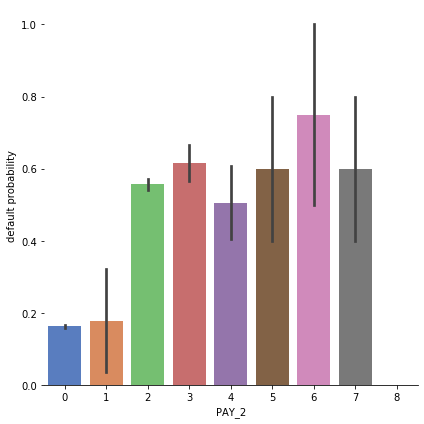

In [48]:
# Explore PAY_2 feature vs default
g = sns.catplot(x="PAY_2",y="default",data=card_df,kind="bar" , height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("default probability")

## PAY_3

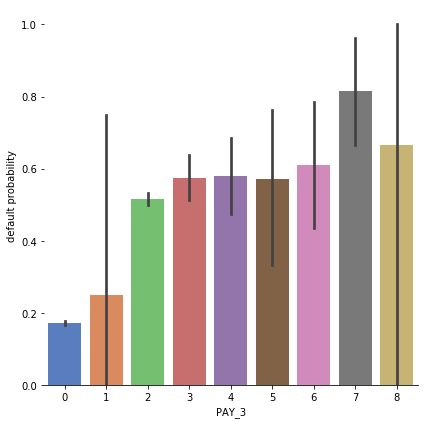

In [49]:
# Explore PAY_3 feature vs default
g = sns.catplot(x="PAY_3",y="default",data=card_df,kind="bar" , height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("default probability")

## PAY_4

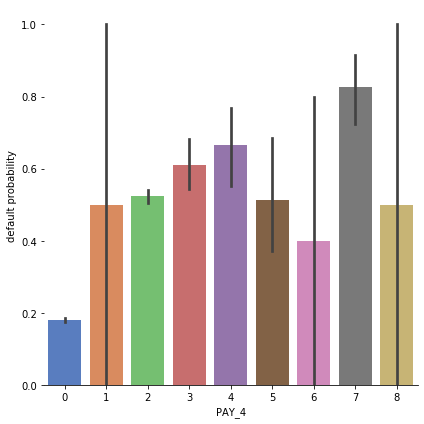

In [50]:
# Explore PAY_4 feature vs default
g = sns.catplot(x="PAY_4",y="default",data=card_df,kind="bar" , height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("default probability")

## PAY_5

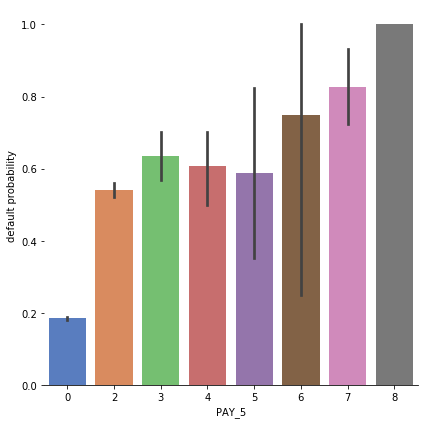

In [51]:
# Explore PAY_5 feature vs default
g = sns.catplot(x="PAY_5",y="default",data=card_df,kind="bar" , height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("default probability")

## PAY_6

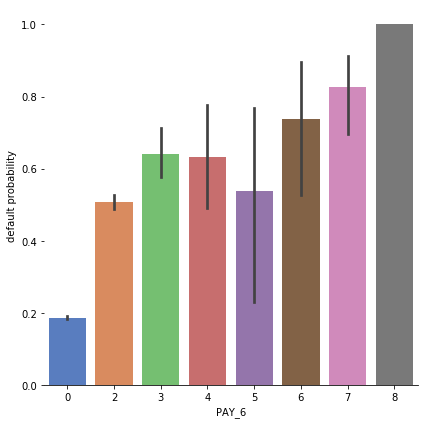

In [52]:
# Explore PAY_6 feature vs default
g = sns.catplot(x="PAY_6",y="default",data=card_df,kind="bar" , height = 6, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("default probability")

## 4.2 Numerical

## 4.2.1 BILL_AMTn

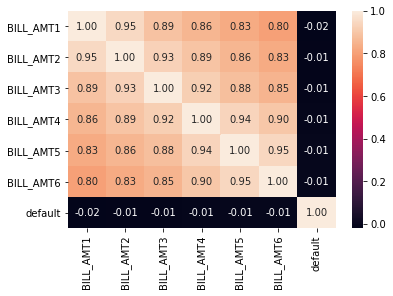

In [53]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(card_df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','default']]
                .corr(),annot=True,fmt = ".2f")

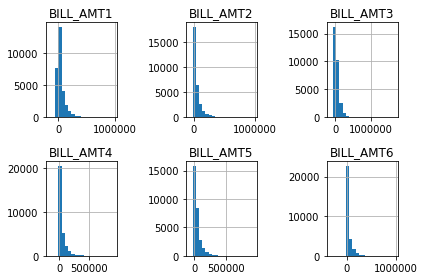

In [54]:
bills = card_df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',]]
draw_histograms(bills, bills.columns, 2, 3, 20)

## 4.2.2 PAY_AMTn

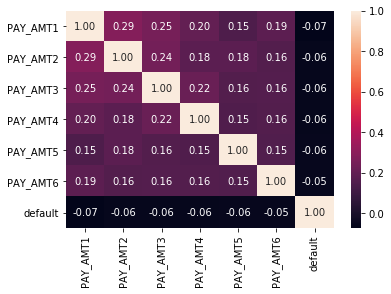

In [56]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(card_df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default']]
                .corr(),annot=True,fmt = ".2f")

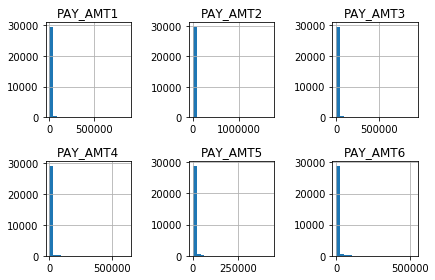

In [57]:
pay = card_df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

## 4.2.3 PAY_n

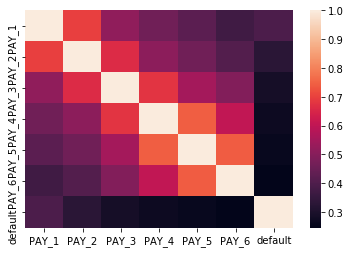

In [58]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(card_df[[ 'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default']].corr(),annot=False,fmt = ".2f")

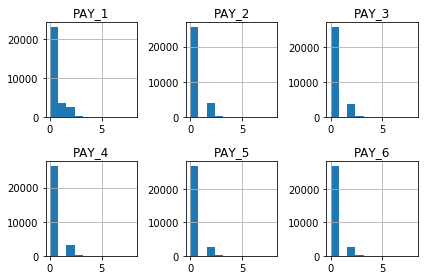

In [59]:
late = card_df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

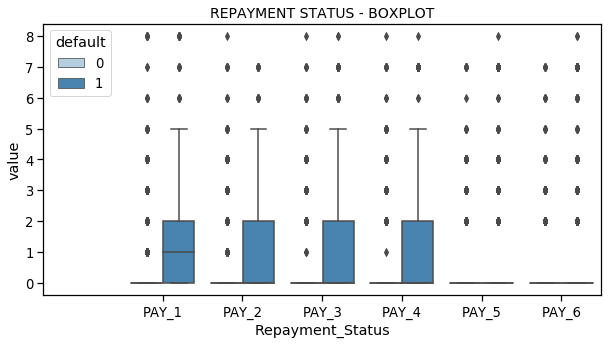

In [118]:
Repayment = card_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

Repayment = pd.concat([y,Repayment],axis=1)
Repayment = pd.melt(Repayment,id_vars="default",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
sns.boxplot(y="value", x="Repayment_Status", hue="default", data=Repayment, palette='Blues')
plt.legend(loc='best', title= 'default', facecolor='white')
plt.xlim([-1.5,5.5])
plt.title('REPAYMENT STATUS - BOXPLOT', size=14)
plt.savefig('ImageName', format='png', dpi=200);

## 4.2.4 Age

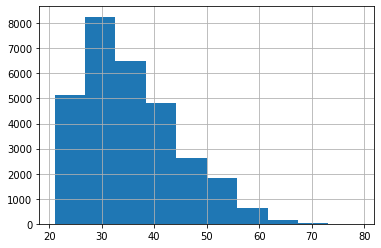

In [60]:
card_df.AGE.hist()

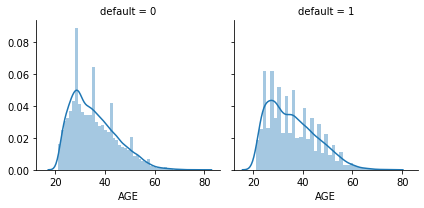

In [61]:
# Explore Age feature vs default
g = sns.FacetGrid(card_df, col='default')
g = g.map(sns.distplot, "AGE")

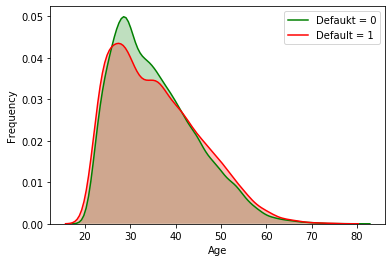

In [62]:
# Explore Age distibution 
g = sns.kdeplot(card_df["AGE"][(card_df["default"] == 0) &
                                  (card_df["AGE"].notnull())], color="Green", shade = True)
g = sns.kdeplot(card_df["AGE"][(card_df["default"] == 1) &
                                  (card_df["AGE"].notnull())], ax =g, color="Red", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Defaukt = 0","Default = 1"])

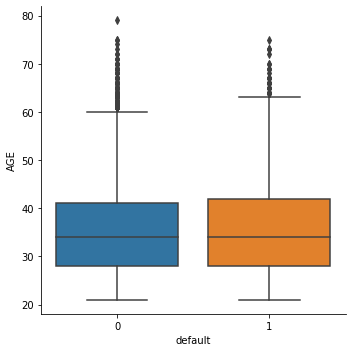

In [63]:
g = sns.catplot(y="AGE",x="default",data=card_df,kind="box")

## 4.2.5 Card Balance Limit

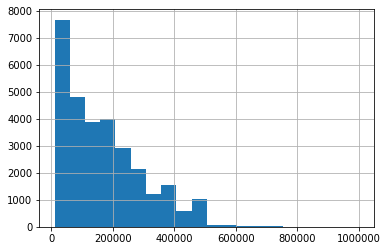

In [64]:
card_df.LIMIT_BAL.hist(bins = 20)

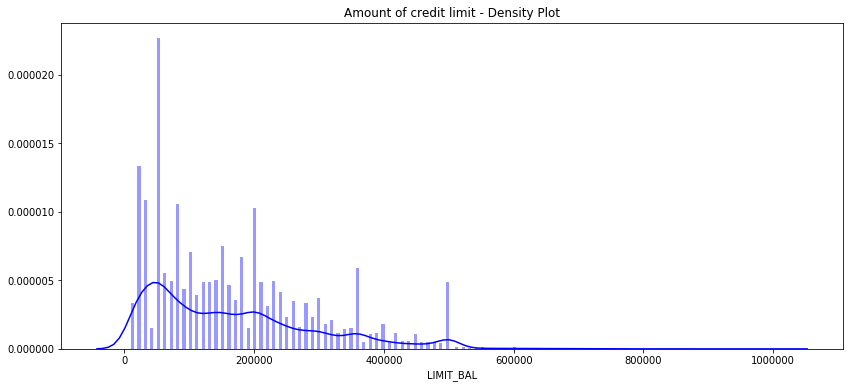

In [65]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(card_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

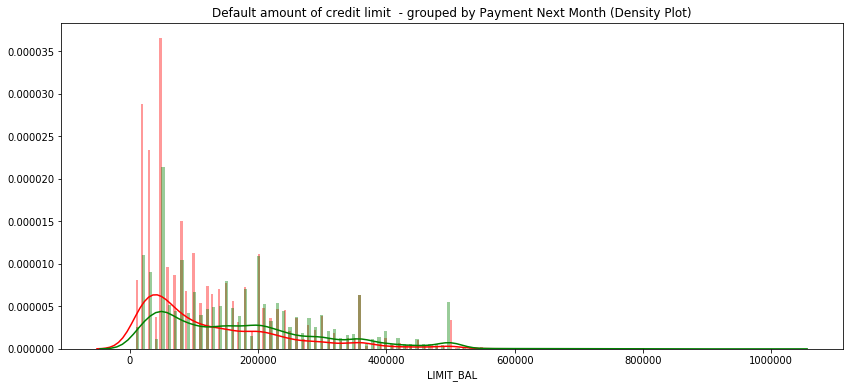

In [69]:
class_0 = card_df.loc[card_df['default'] == 0]["LIMIT_BAL"]
class_1 = card_df.loc[card_df['default'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

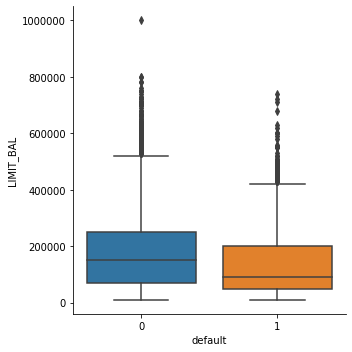

In [66]:
g = sns.catplot(y="LIMIT_BAL",x="default",data=card_df,kind="box")

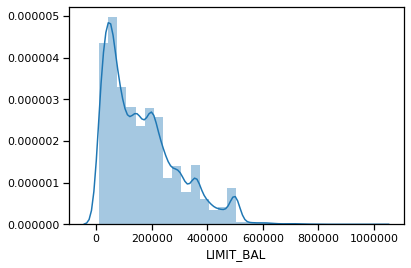

In [107]:
sns.distplot(card_df['LIMIT_BAL'],kde=True,bins=30)
plt.show()

C:\Users\bhave\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


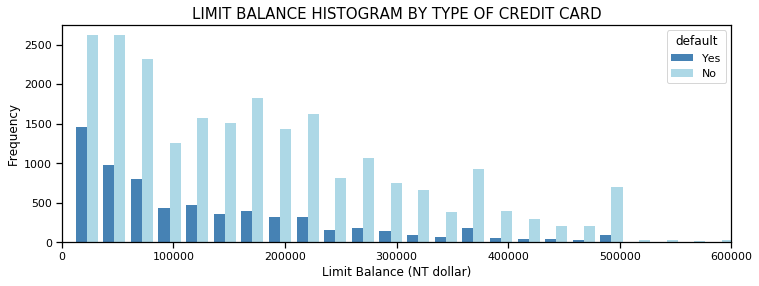

In [117]:
x1 = list(card_df[card_df['default'] == 1]['LIMIT_BAL'])
x2 = list(card_df[card_df['default'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))

plt.hist([x1, x2], bins = 40, normed=False, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

## 4.3 Visualizing features in pairs

## Sex vs Balance Limit

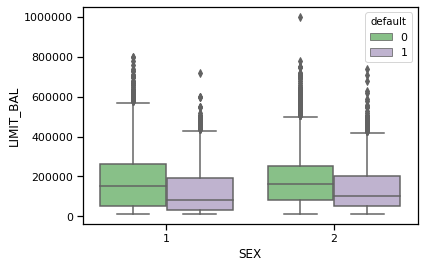

In [111]:
sns.boxplot(x='SEX',hue='default', y='LIMIT_BAL',data=card_df,palette='Accent')

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).

## Age vs Balance Limit

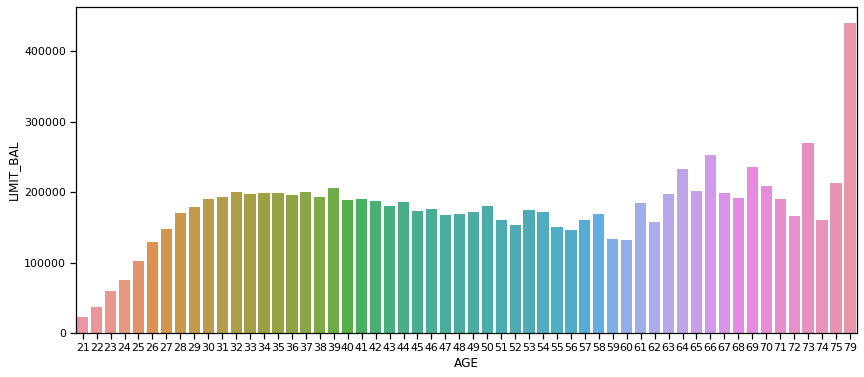

In [108]:
age_df = card_df.groupby('AGE')['LIMIT_BAL'].mean().reset_index()
fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='AGE',y='LIMIT_BAL',ax=ax,data=age_df)

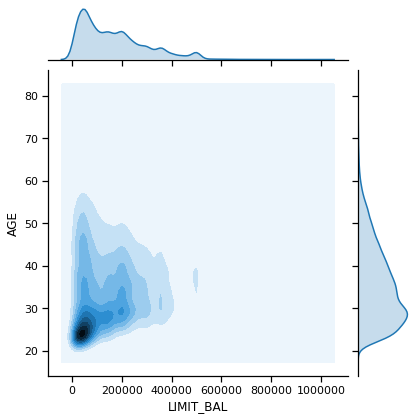

In [113]:
sns.jointplot(x ='LIMIT_BAL', y ='AGE', data = card_df,kind='kde')

## Education vs Balance Limit

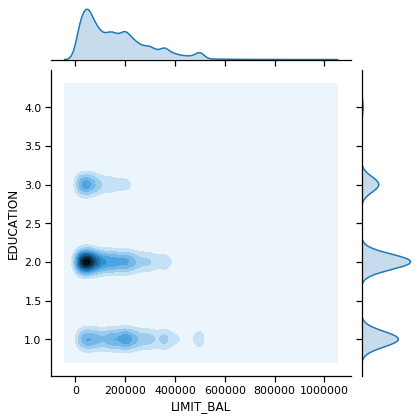

In [115]:
sns.jointplot(x ='LIMIT_BAL', y ='EDUCATION', data = card_df,kind='kde')

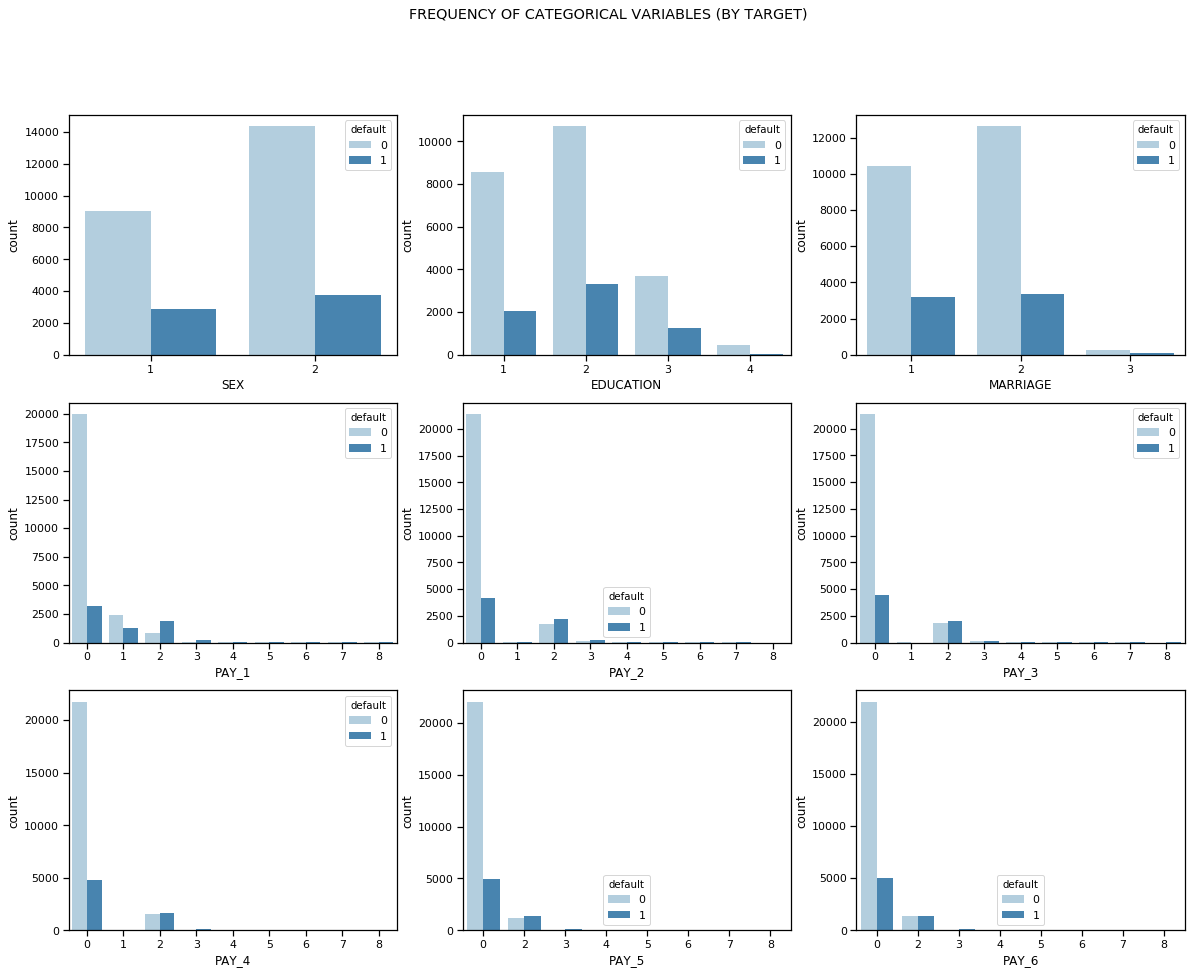

In [81]:
# Creating a new dataframe with categorical variables
subset = card_df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6', 'default']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')

ax1 = sns.countplot(x="SEX", hue="default", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_1", hue="default", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default", data=subset, palette="Blues", ax=axes[2,2]);

(-5000, 100000)

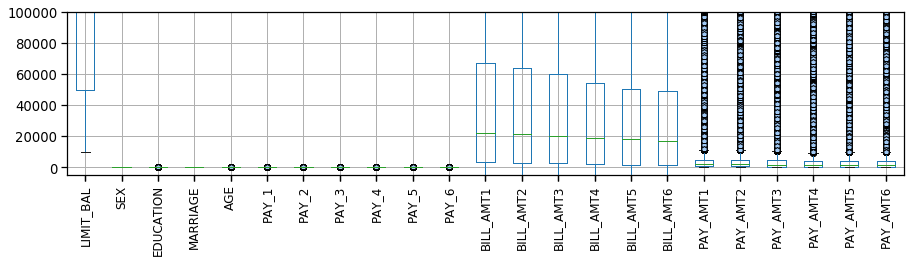

In [84]:
## data are distributed in a wide range (below), need to be normalizded.
plt.figure(figsize=(15,3))
ax= card_df.drop('default', axis=1).boxplot(card_df.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-5000,100000])

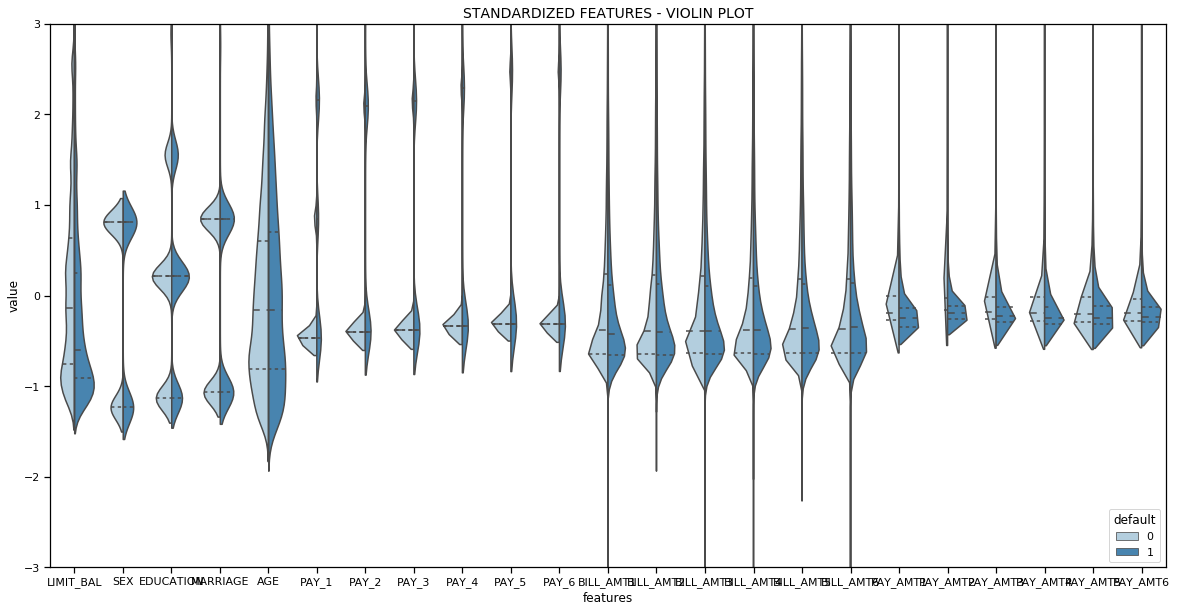

In [85]:
stdX = (features - features.mean()) / (features.std())              # standardization
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="default",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
sns.set_context('notebook', font_scale=1)
sns.violinplot(y="value", x="features", hue="default", data=data_st,split=True, 
               inner="quart", palette='Blues')
plt.legend(loc=4, title= 'default', facecolor='white')
plt.ylim([-3,3])
plt.title('STANDARDIZED FEATURES - VIOLIN PLOT', size=14)
plt.savefig('ImageName', format='png', dpi=200, transparent=False);

## 4.4 Correlations

## All numerical columns with Target default

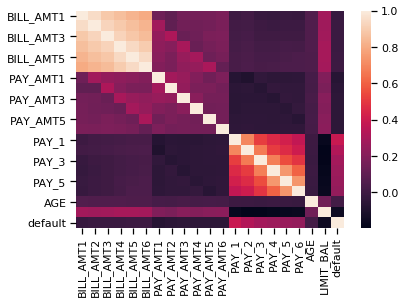

In [86]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(card_df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                         'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' , 
                         'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','AGE','LIMIT_BAL','default']].corr(),annot=False,fmt = ".2f")

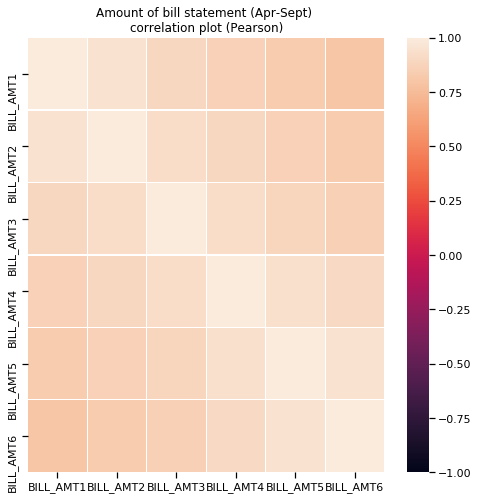

In [87]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = card_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

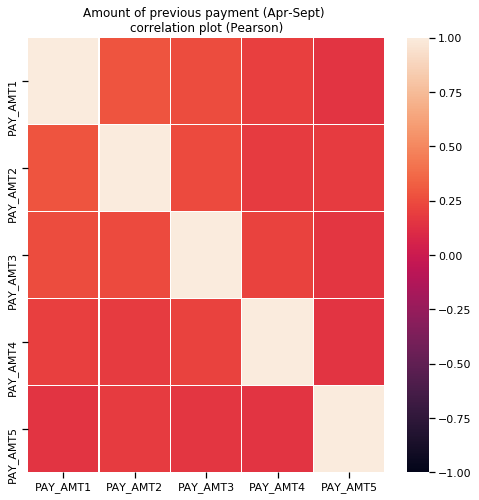

In [88]:
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = card_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

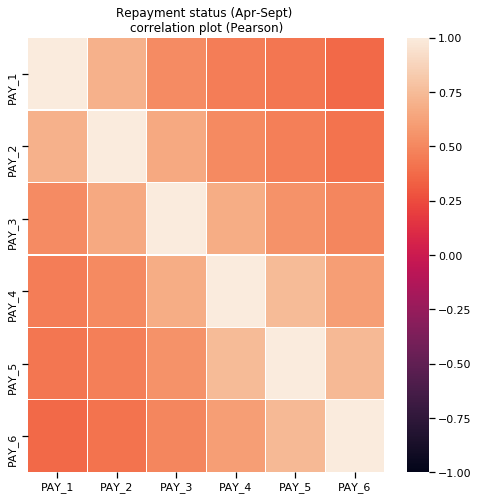

In [89]:
var = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = card_df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

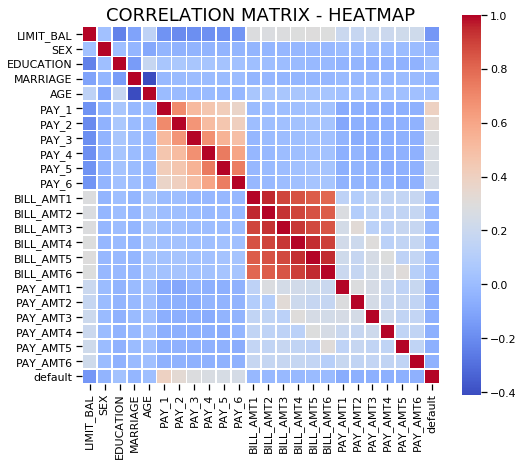

In [90]:
#  looking at correlations matrix, defined via Pearson function  
corr = card_df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

## 5. Data Processing

## 5.1 Test Train Split

In [14]:
#Splitting dataset into Trainset and Testset
X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=4)
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (24000, 23)
Number transactions y_train dataset:  (24000,)
Number transactions X_test dataset:  (6000, 23)
Number transactions y_test dataset:  (6000,)


In [122]:
#y = norm_card_df['default']
#features = norm_card_df.drop(['default'],axis=1)

## 5.2 Data Normalization

In [ ]:
to_normalize = X_train.columns
norm_X_train = X_train.copy()
norm_X_test = X_test.copy()
#min_max_scaler = preprocessing.MinMaxScaler()
scaler = StandardScaler()

for var in to_normalize:
    x_train_scaled = scaler.fit_transform(np.array(X_train[var]).reshape(-1, 1))
    x_test_scaled = scaler.transform(np.array(X_test[var]).reshape(-1, 1))
    norm_X_train.drop([var],axis=1)
    norm_X_train[var] = x_train_scaled
    norm_X_test.drop([var],axis=1)
    norm_X_test[var] = x_test_scaled
    

In [16]:
X_train = norm_X_train
X_test = norm_X_test

In [ ]:
X_train

## 6.Modeling

## 6.1 Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.01,solver='liblinear',random_state =1)
lr.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

In [20]:
CM1 = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:" "\n",CM1 ) 
print()

Confusion Matrix:
 [[4443  195]
 [ 934  428]]



In [21]:
C1=metrics.classification_report(y_test,y_pred)
print("Classification Report : ",C1)
print()

Classification Report :                precision    recall  f1-score   support

           0       0.83      0.96      0.89      4638
           1       0.69      0.31      0.43      1362

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.79      0.81      0.78      6000




In [22]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,log_loss

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
err=(y_pred != y_test).sum()
loglos = log_loss(y_test,y_pred)

results = pd.DataFrame([['Logistic Regression', acc, err, prec, rec, f1, roc]],
               columns = ['Model', 'Accuracy', 'Number of Errors','Precision', 'Recall', 'F1 Score','ROC'])
final_report = results
results

,Model,Accuracy,Number of Errors,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.811833,1129,0.686998,0.314244,0.431234,0.6361


## 6.2 K Nearest Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
CV_Scores = []
knn = KNeighborsClassifier(n_neighbors = 6, algorithm = 'kd_tree')
scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring='recall')
CV_Scores.append(scores.mean())

### Selecting the best value of n_neighbors

In [25]:
myList = list(range(0,25))
neighbors = list(filter(lambda x: x%2!=0, myList))  #This will give a list of odd numbers only ranging from 0 to 50

error_rate = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))


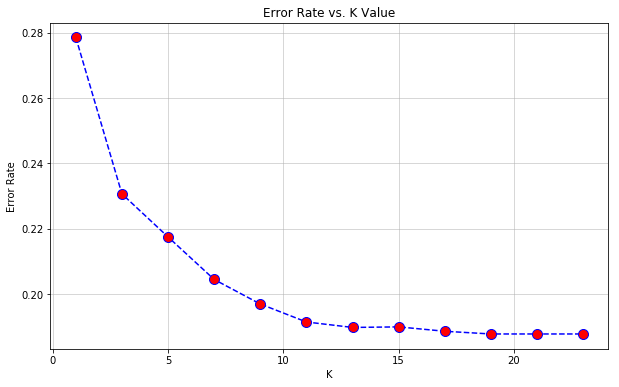

In [26]:
plt.figure(figsize=(10,6))
plt.plot(neighbors,error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.grid(linestyle='-', linewidth=0.5)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [28]:
y_pred = knn.predict(X_test)

In [29]:
CM1 = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:" "\n",CM1 ) 
print()

Confusion Matrix:
 [[4422  216]
 [ 984  378]]



In [30]:
C1=metrics.classification_report(y_test,y_pred)
print("Classification Report : ",C1)
print()

Classification Report :                precision    recall  f1-score   support

           0       0.82      0.95      0.88      4638
           1       0.64      0.28      0.39      1362

   micro avg       0.80      0.80      0.80      6000
   macro avg       0.73      0.62      0.63      6000
weighted avg       0.78      0.80      0.77      6000




In [31]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
err=(y_pred != y_test).sum()

res = pd.DataFrame([['K-Nearest Neighbour', err,acc,prec,rec, f1,roc]],
               columns = ['Model','Number of Errors' ,'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
final_report = final_report.append(res, ignore_index = True)
res

C:\Users\Pranjul\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Model,Number of Errors,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,1200,0.8,0.636364,0.277533,0.386503,0.615481


## 6.3 Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
y_pred =naive_bayes.predict(X_test)

In [34]:
pred_score=naive_bayes.predict_proba(X_test)
pred_score[0:10]

array([[9.51801945e-01, 4.81980547e-02],
       [9.99803726e-01, 1.96273989e-04],
       [9.47960850e-01, 5.20391499e-02],
       [9.73198275e-01, 2.68017248e-02],
       [3.00763266e-05, 9.99969924e-01],
       [7.12785069e-12, 1.00000000e+00],
       [9.55921118e-01, 4.40788824e-02],
       [7.51576737e-02, 9.24842326e-01],
       [1.00000000e+00, 4.72849207e-81],
       [9.54883560e-01, 4.51164402e-02]])

In [35]:
CM1 = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:" "\n",CM1 ) 
print()

Confusion Matrix:
 [[3833  805]
 [ 599  763]]



In [36]:
C1=metrics.classification_report(y_test,y_pred)
print("Classification Report : ",C1)
print()

Classification Report :                precision    recall  f1-score   support

           0       0.86      0.83      0.85      4638
           1       0.49      0.56      0.52      1362

   micro avg       0.77      0.77      0.77      6000
   macro avg       0.68      0.69      0.68      6000
weighted avg       0.78      0.77      0.77      6000




In [37]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
err =(y_pred != y_test).sum()

res= pd.DataFrame([['Gaussian Naive Bayes', err,acc,prec,rec, f1,roc]],
               columns = ['Model', 'Number of Errors','Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
final_report = final_report.append(res, ignore_index = True)
res

C:\Users\Pranjul\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Model,Number of Errors,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,1404,0.766,0.486607,0.560206,0.520819,0.69332


## 6.4 Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [39]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [40]:
y_pred = dt.predict(X_test)

In [41]:
CM1 = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:" "\n",CM1 ) 
print()

Confusion Matrix:
 [[3826  812]
 [ 809  553]]



In [42]:
C1=metrics.classification_report(y_test,y_pred)
print("Classification Report : ",C1)
print()


Classification Report :                precision    recall  f1-score   support

           0       0.83      0.82      0.83      4638
           1       0.41      0.41      0.41      1362

   micro avg       0.73      0.73      0.73      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.73      0.73      0.73      6000




In [43]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
err =(y_pred != y_test).sum()

res= pd.DataFrame([['Decision Tree Classifier', err,acc,prec,rec, f1,roc]],
               columns = ['Model', 'Number of Errors','Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
final_report = final_report.append(res, ignore_index = True)
res

C:\Users\Pranjul\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Model,Number of Errors,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,1621,0.729833,0.405128,0.406021,0.405574,0.615473


## 6.5 Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)
rdf.fit(X_train, y_train);

In [45]:
y_pred = rdf.predict(X_test)

In [46]:
CM1 = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:" "\n",CM1 ) 
print()

Confusion Matrix:
 [[4389  249]
 [ 878  484]]



In [47]:
C1=metrics.classification_report(y_test,y_pred)
print("Classification Report : ",C1)
print()

Classification Report :                precision    recall  f1-score   support

           0       0.83      0.95      0.89      4638
           1       0.66      0.36      0.46      1362

   micro avg       0.81      0.81      0.81      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000




In [48]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
err =(y_pred != y_test).sum()

res= pd.DataFrame([['Random Forest Classifier', err,acc,prec,rec, f1,roc]],
               columns = ['Model', 'Number of Errors','Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
final_report = final_report.append(res, ignore_index = True)
res

C:\Users\Pranjul\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Model,Number of Errors,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Classifier,1127,0.812167,0.6603,0.35536,0.462053,0.650836


In [49]:
final_report

,Accuracy,F1 Score,Model,Number of Errors,Precision,ROC,Recall
0,0.811833,0.431234,Logistic Regression,1129,0.686998,0.636100,0.314244
1,0.800000,0.386503,K-Nearest Neighbour,1200,0.636364,0.615481,0.277533
2,0.766000,0.520819,Gaussian Naive Bayes,1404,0.486607,0.693320,0.560206
3,0.729833,0.405574,Decision Tree Classifier,1621,0.405128,0.615473,0.406021
4,0.812167,0.462053,Random Forest Classifier,1127,0.660300,0.650836,0.355360


## 7. Hyperparameter Tuning using Grid Search and K-Fold Cross validation

## 7.1 Tuning Logistic Regression

In [50]:
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [51]:
grid_search_log = GridSearchCV(estimator=lr,param_grid=lr_params,scoring='accuracy',cv=10,n_jobs=-1)

In [52]:
grid_search_log = grid_search_log.fit(X_train,y_train)

In [53]:
best_accuracy = grid_search_log.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8185833333333333


In [54]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 10, 'class_weight': None, 'penalty': 'l1'}

In [55]:
y_pred_log = grid_search_log.predict(X_test)
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
err =(y_pred_log != y_test).sum()

model_results =  pd.DataFrame([['Logistic Regression Tuned',err, acc,prec,rec, f1,roc]],
               columns = ['Model','Number of Errors' ,'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
final_report = final_report.append(model_results, ignore_index = True)
model_results

C:\Users\Pranjul\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Model,Number of Errors,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,1116,0.814,0.696486,0.320117,0.438632,0.639576


## 7.2 Tuning KNN

In [56]:
#k_range = list(range(1, 30 , 3))
leaf_size = list(range(1,30 , 5))
weight_options = ['uniform', 'distance']
#knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
knn_param = {'leaf_size': leaf_size, 'weights': weight_options}

In [57]:
grid_search_knn = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_knn = grid_search_knn.fit(X_train,y_train)

In [58]:
best_accuracy = grid_search_knn.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8080416666666667


In [59]:
best_parameters = grid_search_knn.best_params_
best_parameters

{'leaf_size': 6, 'weights': 'uniform'}

In [60]:
y_pred_KNN = grid_search_knn.predict(X_test)
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
err =(y_pred_KNN != y_test).sum()

model =  pd.DataFrame([['KNN Model Tuned',err, acc,prec,rec, f1,roc]],
               columns = ['Model','Number of Errors', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
final_report = final_report.append(model, ignore_index = True)
model

C:\Users\Pranjul\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Model,Number of Errors,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN Model Tuned,1200,0.8,0.636364,0.277533,0.386503,0.615481


## 7.3 Tuning Naive Bayes

## 7.4 Tuning Decision Tree

In [61]:
dt_parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dt,param_grid=dt_parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)

In [62]:
best_accuracy = grid_search_dt.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8212083333333333


In [63]:
best_parameters = grid_search_dt.best_params_
best_parameters

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [64]:
y_pred_dct = grid_search_dt.predict(X_test)

roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
err =(y_pred_dct != y_test).sum()

model =  pd.DataFrame([['Decision Tree Tuned',err, acc,prec,rec, f1,roc]],
               columns = ['Model','Number of Errors','Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
final_report = final_report.append(model, ignore_index = True)
model

C:\Users\Pranjul\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Model,Number of Errors,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Tuned,1094,0.817667,0.710692,0.331865,0.452452,0.646096


## 7.5 Tuning Random Forest

In [65]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rdf,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [66]:
best_accuracy = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8162916666666666


In [67]:
best_parameters = grid_search_rf.best_params_
best_parameters

{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 200}

In [68]:
y_pred_rv = grid_search_rf.predict(X_test)

roc=roc_auc_score(y_test, y_pred_rv)
acc = accuracy_score(y_test, y_pred_rv)
prec = precision_score(y_test, y_pred_rv)
rec = recall_score(y_test, y_pred_rv)
f1 = f1_score(y_test, y_pred_rv)
err =(y_pred_rv != y_test).sum()

model =  pd.DataFrame([['Random Forest Tuned',err, acc,prec,rec, f1,roc]],
               columns = ['Model','Number of Errors', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
final_report = final_report.append(model, ignore_index = True)
model

C:\Users\Pranjul\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Model,Number of Errors,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Tuned,1115,0.814167,0.671766,0.354626,0.4642,0.651871


In [69]:
final_report

,Accuracy,F1 Score,Model,Number of Errors,Precision,ROC,Recall
0,0.811833,0.431234,Logistic Regression,1129,0.686998,0.636100,0.314244
1,0.800000,0.386503,K-Nearest Neighbour,1200,0.636364,0.615481,0.277533
2,0.766000,0.520819,Gaussian Naive Bayes,1404,0.486607,0.693320,0.560206
3,0.729833,0.405574,Decision Tree Classifier,1621,0.405128,0.615473,0.406021
4,0.812167,0.462053,Random Forest Classifier,1127,0.660300,0.650836,0.355360
5,0.814000,0.438632,Logistic Regression Tuned,1116,0.696486,0.639576,0.320117
6,0.800000,0.386503,KNN Model Tuned,1200,0.636364,0.615481,0.277533
7,0.817667,0.452452,Decision Tree Tuned,1094,0.710692,0.646096,0.331865
8,0.814167,0.464200,Random Forest Tuned,1115,0.671766,0.651871,0.354626


## 8. Comparing Classifiers using ROC

In [235]:
y_pred_log_p =grid_search_log.predict_proba(X_test)[:,1]
y_pred_knn_p =grid_search_knn.predict_proba(X_test)[:,1]
y_pred_dt_p =grid_search_dt.predict_proba(X_test)[:,1]
y_pred_rf_p =grid_search_rf.predict_proba(X_test)[:,1]

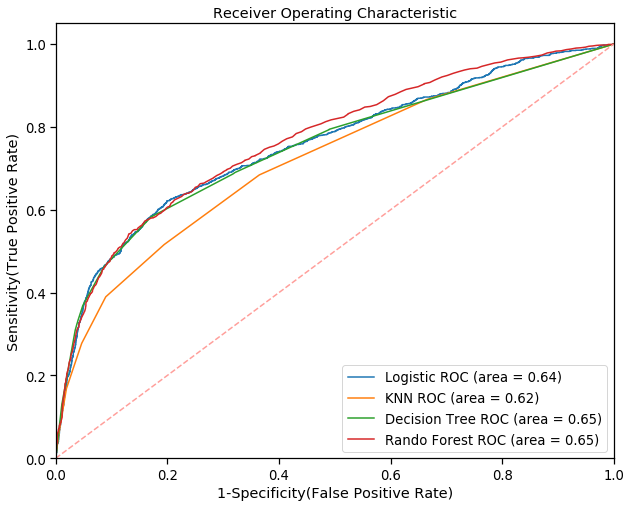

In [237]:
model = [grid_search_log,grid_search_knn,grid_search_dt,grid_search_rf]

models=[y_pred_log_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p]
label=['Logistic','KNN','Decision Tree','Rando Forest']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(4)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()